
# AIML COURSE PROJECT
**Spoify Songs Prediction**

Dataset:https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots


import scipy.stats
from tabulate import tabulate

df=pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")
print(df)

              artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceability  energy  key  loudness  mode

In [ ]:
Spotify = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")
Spotify.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
Spotify = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")
Spotify.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [ ]:
print(df.dtypes)

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object


In [ ]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


Data Analysis and Visualization


In [ ]:
songs_per_years = df['year'].value_counts().sort_index()
songs_per_years

1998      1
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
2020      3
Name: year, dtype: int64

In [ ]:
histogram_labels = ['popularity',
                    'danceability',
                    'energy',
                    'speechiness',
                    'loudness',
                    'acousticness',
                    'liveness',
                    'instrumentalness',
                    'valence',
                    'tempo'
                   ]

colors = px.colors.qualitative.Vivid

for i in range(len(histogram_labels)):
    iplot(px.histogram(df,
                      histogram_labels[i],
                      title=f'{histogram_labels[i]} distribution in top hits',
                      color_discrete_sequence=[colors[i]])
         )

In [ ]:
iplot(px.bar(songs_per_years,
       title='Number of songs per year',
       text_auto=True,
       labels=dict(index='year',value='Songs'),
       color_discrete_sequence=['Green']).update_xaxes(type='category')
     )

In [ ]:
artists = df['artist'].value_counts()
artists

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

In [ ]:
artist_df = df[['artist', 'popularity']].groupby('artist').mean().sort_values(by='artist')

artists = artists.sort_index()

artist_df['total songs'] = artists.values

artist_df.sort_values(by='total songs',ascending=False, inplace=True)

artist_df.reset_index(inplace=True)

artist_df

,artist,popularity,total songs
0,Rihanna,72.120000,25
1,Drake,61.913043,23
2,Eminem,72.333333,21
3,Calvin Harris,67.800000,20
4,Britney Spears,63.052632,19
...,...,...,...
830,Khia,59.000000,1
831,Kevin Rudolf,66.000000,1
832,Kevin Lyttle,67.000000,1
833,Kevin Gates,69.000000,1


In [ ]:
iplot(px.scatter(artist_df[:10],
                 x = 'artist',
                 y = 'popularity',
                 size = 'total songs',
                 size_max = 40,
                 color= 'popularity',
                 title='Top 10 artists vs average popularity of their top hits',
                 hover_name='artist'
                )
)

In [ ]:
def ms_to_minsec(ms):
    sec = ms / 1000
    return f"{int(sec // 60)}:{int(sec % 60)}"
durations =  df[['duration_ms','year']].groupby('year').mean().reset_index().iloc[1:-1]

durations['duration_s'] = durations['duration_ms'] / 1000

durations['min:sec'] = durations['duration_ms'].apply(ms_to_minsec)

iplot(px.line(durations,
        x='year',
        y='duration_s',
        title='Average Song duration over the years',
        text='min:sec').update_xaxes(type='category').update_traces(textposition='top right')
     )

In [ ]:
year_explicit = df.groupby(['year','explicit']).size().unstack(fill_value=0).reset_index()
year_explicit.rename(columns={False:'Clean', True: 'Explicit'}, inplace=True)
year_explicit

explicit,year,Clean,Explicit
0,1998,0,1
1,1999,30,8
2,2000,62,12
3,2001,85,23
4,2002,60,30
5,2003,74,23
6,2004,60,36
7,2005,75,29
8,2006,69,26
9,2007,72,22


In [ ]:
iplot(px.histogram(year_explicit,
                   x = 'year',
                   y=['Clean', 'Explicit'],
                   title='Explicit vs Clean distribution each year',
                   color_discrete_sequence=['cornflowerblue', 'crimson']
                  ).update_xaxes(type='category')
     )

<Axes: xlabel='genre'>

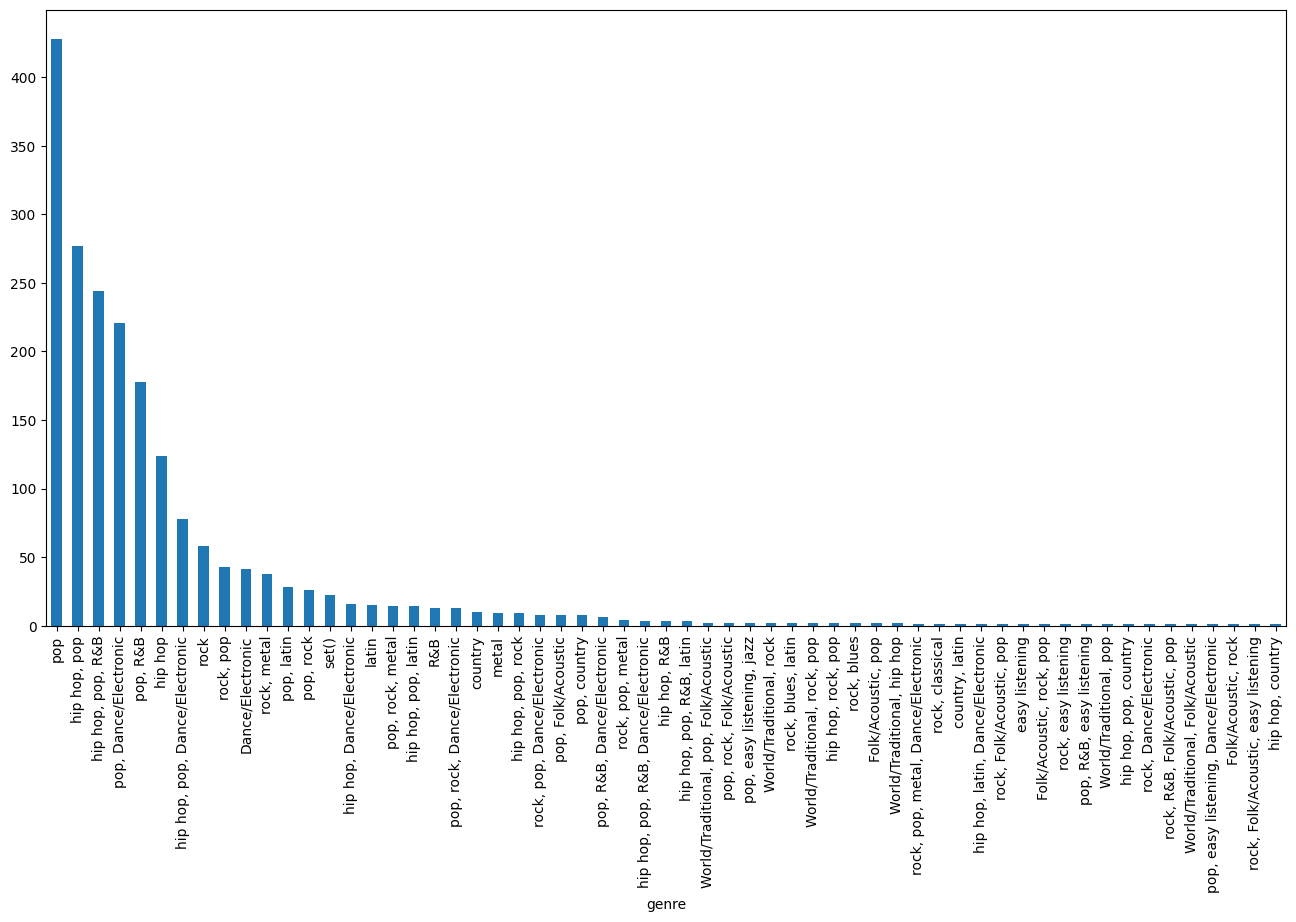

In [8]:
#All music genres on the list
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")
plt.figure(figsize = (16, 8))
df["genre"].value_counts().plot(kind="bar")

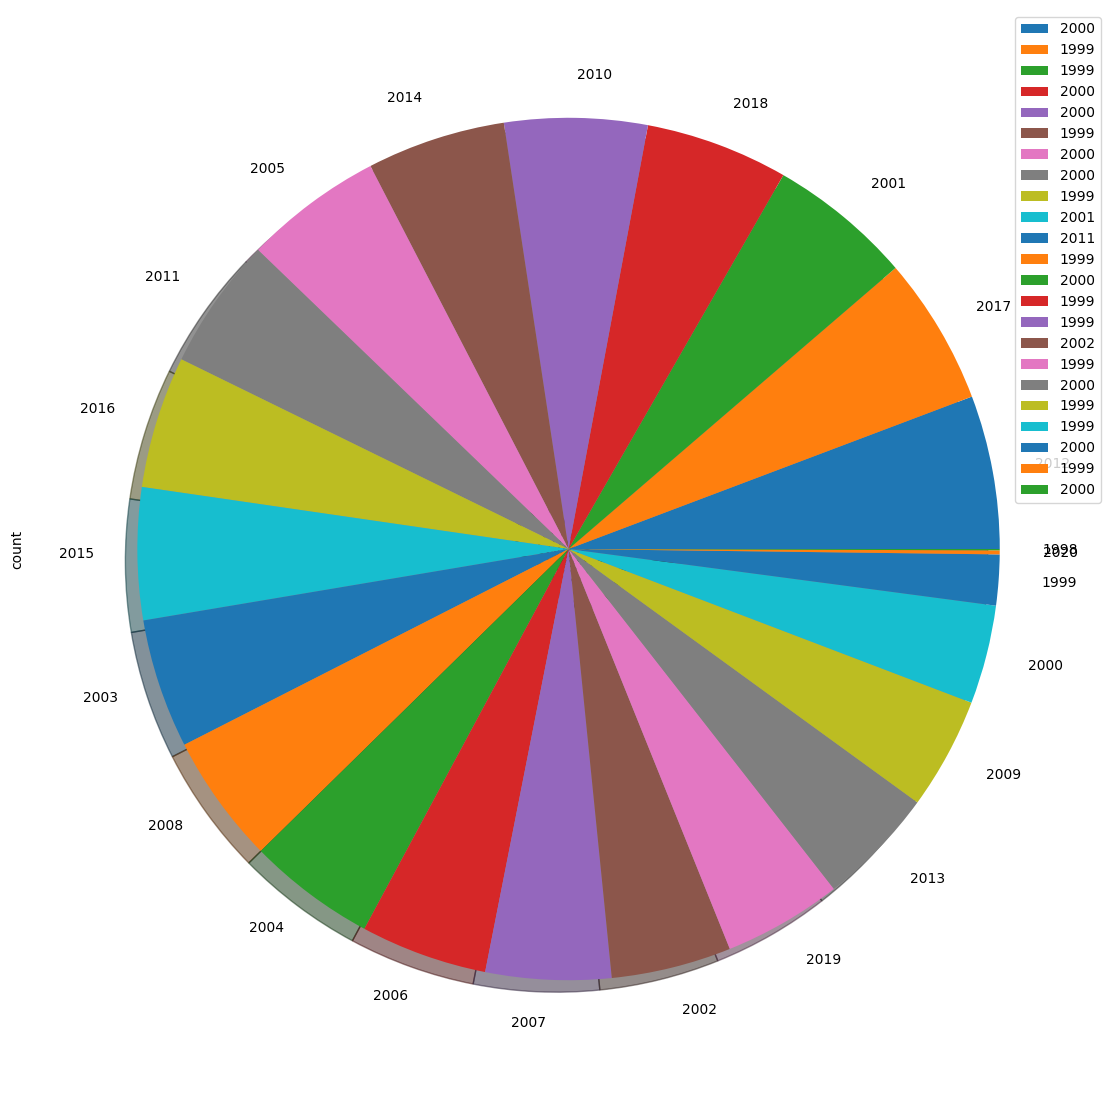

In [9]:
#Frequency of popular songs by year
plt.figure(figsize = (16, 14))
df["year"].value_counts().plot(kind="pie",shadow=True)
plt.legend(df["year"])

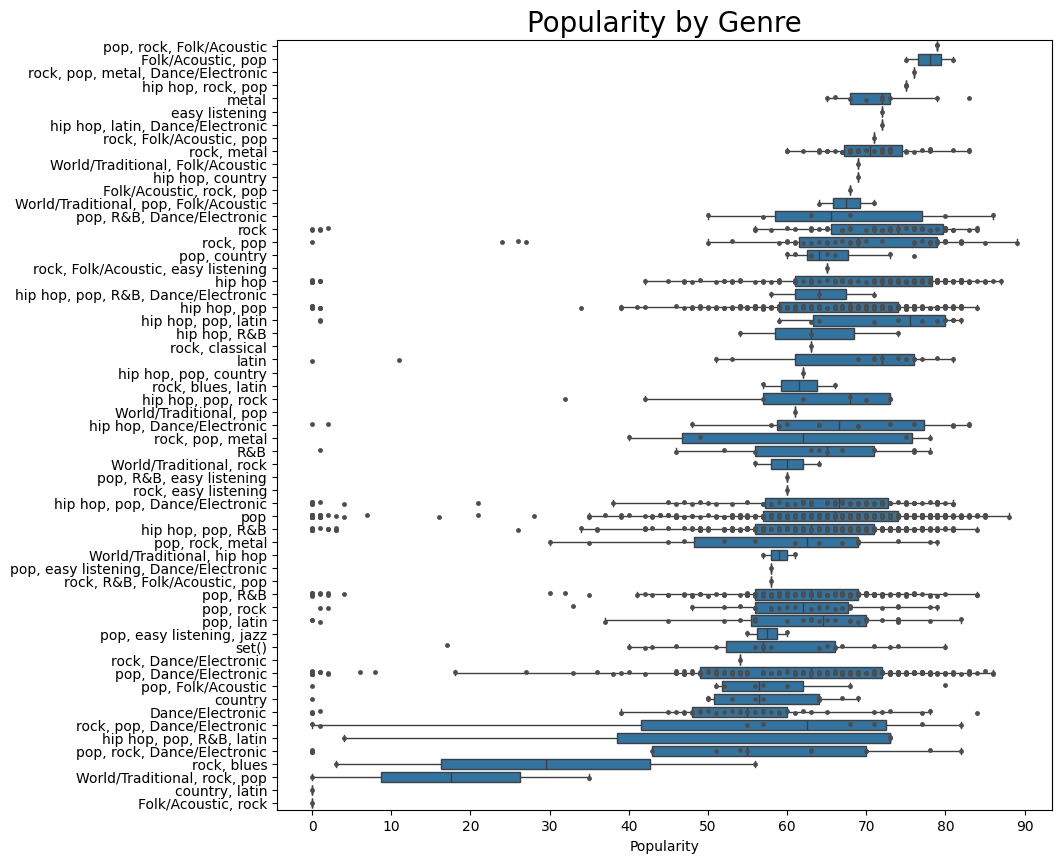

In [10]:
plt.rcParams["figure.figsize"] = (10,10)
order = df.groupby("genre")["popularity"].mean().sort_values(ascending=False).index.values
ax = sns.boxplot(x="popularity", y="genre", data=df,
                  order=order, fliersize=0)
sns.stripplot(x="popularity", y="genre", data=df,
              order=order, color=".3", size=3.5)
ax.set_title("Popularity by Genre", fontsize=20)
ax.set_ylabel("")
ax.set_xlabel("Popularity")
ax.set_xticks(np.arange(0, 91, 10))
plt.show()


Text(0.5, 0, 'Average popularity')

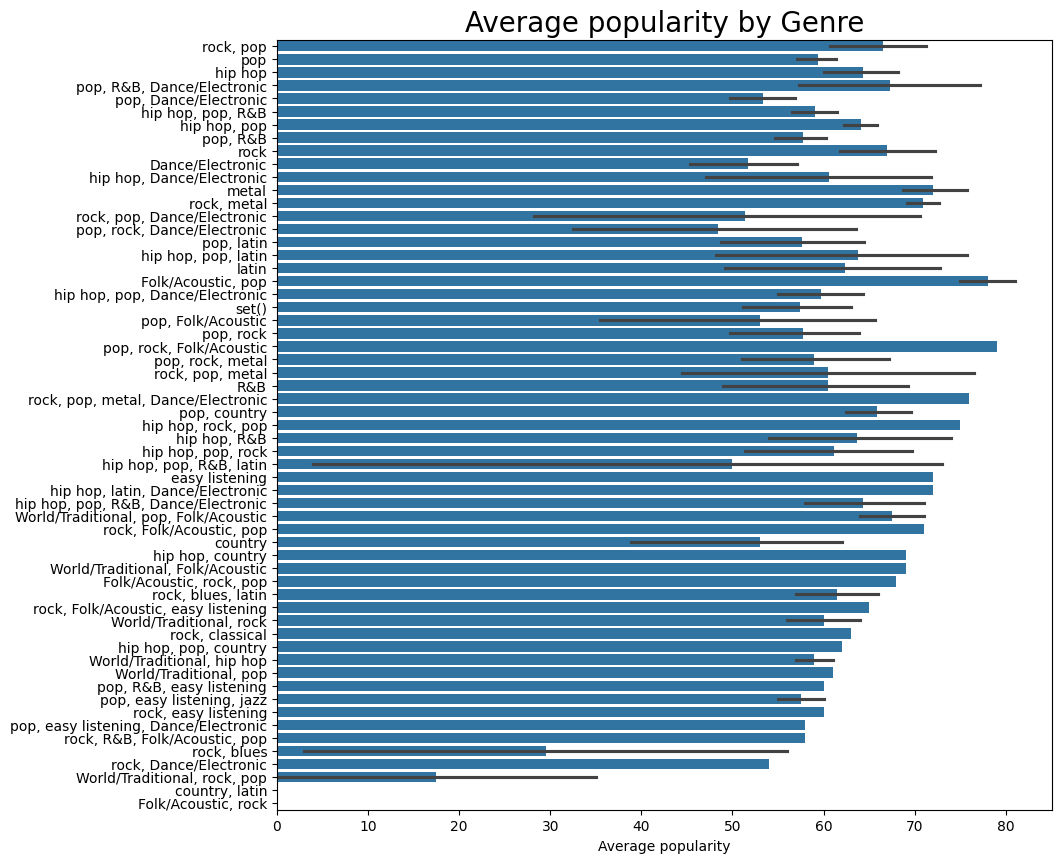

In [11]:
# Popularity by genres
plt.rcParams["figure.figsize"] = (10,10)
ax = sns.barplot(x="popularity", y="genre",data=df.sort_values("popularity", ascending=False))
ax.set_title("Average popularity by Genre", fontsize=20)
ax.set_ylabel("")
ax.set_xlabel("Average popularity")

<Axes: xlabel='genre', ylabel='year'>

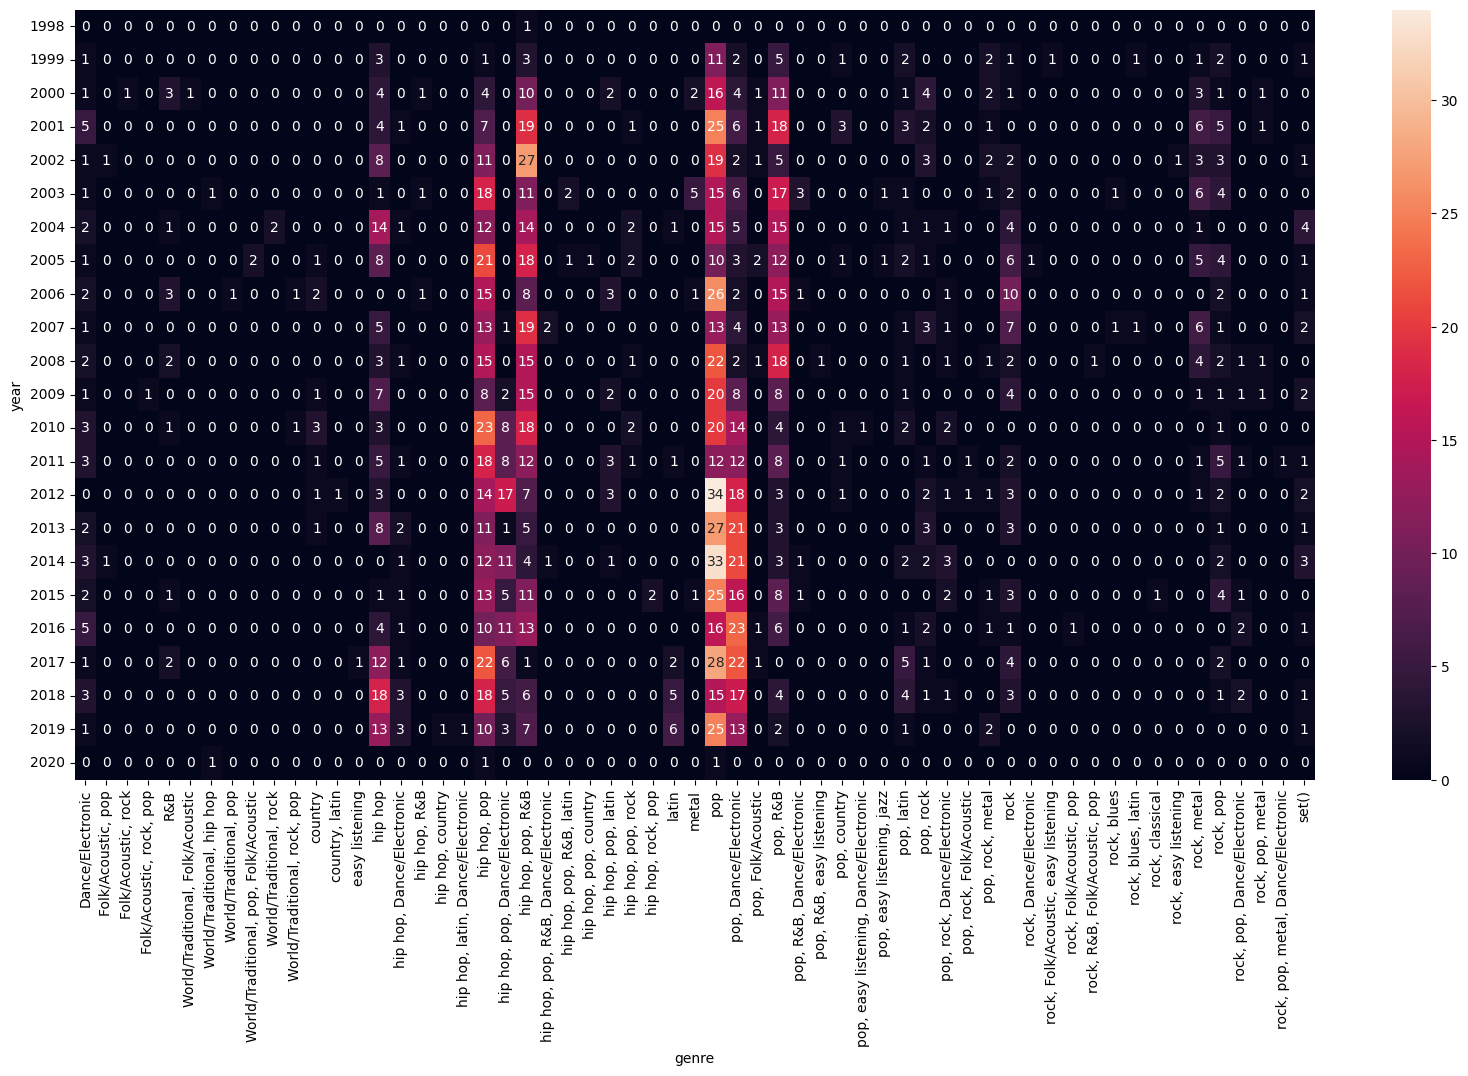

In [12]:
df_ = (df.filter(['year', 'genre']).groupby(['year', 'genre']).size().unstack(fill_value=0))

plt.figure(figsize=(20,10))
sns.heatmap(data=df_, annot=True)


# **Linear Regression for Genre Prediction**

This code implements linear regression to predict music genres based on the release year of songs. It utilizes scikit-learn, a popular machine learning library in Python, for model building and evaluation, as well as matplotlib for data visualization.

**1. Importing Necessary Libraries:**
   - `pandas`, `sklearn.model_selection`, `sklearn.preprocessing`, `sklearn.linear_model`, and `sklearn.metrics` are imported for data manipulation, model training/testing, preprocessing, linear regression modeling, and performance evaluation, respectively.
   - `matplotlib.pyplot` is imported for data visualization.

**2. Loading the Dataset:**
   - The dataset is loaded from a CSV file. Ensure the correct path to the dataset is provided.

**3. Data Preprocessing:**
   - The features (`year`) and target variable (`genre`) are extracted from the dataset.
   - The categorical target variable `genre` is encoded into numerical form using `LabelEncoder`.

**4. Splitting Data:**
   - The data is divided into training and testing sets using `train_test_split`.

**5. Model Training:**
   - The linear regression model is instantiated and trained with the training data using the `LinearRegression` class.

**6. Model Evaluation:**
   - The model predicts genre labels for the test data.
   - Performance metrics including mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE) are calculated and printed.

**7. Plotting the Regression Line:**
   - A scatter plot of actual data points (year vs. genre) from the test set is plotted in blue.
   - The linear regression line is plotted in red, representing the predicted genre values.

**8. Displaying the Plot:**
   - The plot is displayed with appropriate axis labels, a title, and a legend.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Provided dataset
data = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")

# Verify column names in the dataset
print(data.columns)

# Split data into features and target
X = data[['year']]  # Make sure to use the correct column name from your dataset

# Convert the categorical target variable "genre" into numerical form using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['genre'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Coefficients (w values):", model.coef_)


Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')
Mean Squared Error: 122.76099978573856
Mean Absolute Error: 8.689604584606933
Root Mean Squared Error: 11.079756305340771
Coefficients (w values): [-0.16997373]


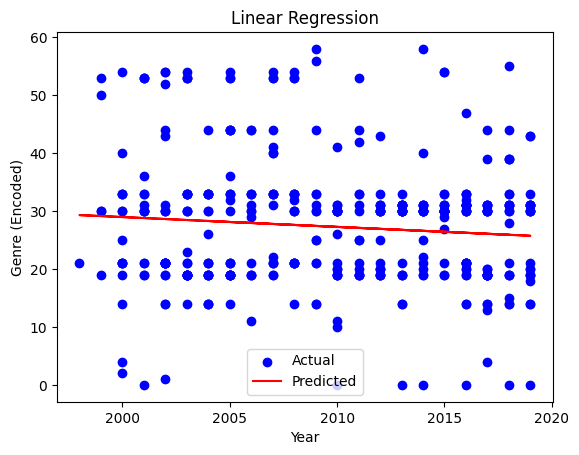

In [ ]:
import matplotlib.pyplot as plt

# Plot actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot regression line
plt.plot(X_test, predictions, color='red', label='Predicted')

# Add labels and title
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Genre (Encoded)')
plt.legend()

# Show plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Provided dataset
data = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")

# Verify column names in the dataset
print(data.columns)

# Split data into features and target
X = data[['year']]  # Make sure to use the correct column name from your dataset
y = data['popularity']  # Make sure to use the correct column name from your dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Coefficients (w values):", model.coef_)


Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')
Mean Squared Error: 479.0962387344614
Mean Absolute Error: 15.020955951119308
Root Mean Squared Error: 21.88826714782286
Coefficients (w values): [0.00840642]




# **Logistic Regression for Genre Classification**

This code implements logistic regression to predict music genres based on the year of release. It utilizes scikit-learn, a popular machine learning library in Python, for model building and evaluation.

**1. Importing Necessary Libraries:**
   - `pandas`, `numpy`, and `matplotlib.pyplot` for data manipulation, numerical computing, and data visualization, respectively.
   - `train_test_split` from `sklearn.model_selection` for splitting the dataset into training and testing sets.
   - `LogisticRegression` from `sklearn.linear_model` for building the logistic regression model.
   - `accuracy_score` and `classification_report` from `sklearn.metrics` for evaluating the model's performance.
   - `LabelEncoder` from `sklearn.preprocessing` for encoding the categorical target variable into numerical form.

**2. Loading the Dataset:**
   - The dataset is loaded from a CSV file. Ensure to provide the correct path to the dataset.

**3. Data Preprocessing:**
   - The features (`year`) and the target variable (`genre`) are extracted from the dataset.
   - The categorical target variable `genre` is encoded into numerical form using `LabelEncoder`.

**4. Splitting Data:**
   - The data is split into training and testing sets using the `train_test_split` function.

**5. Model Building:**
   - The logistic regression model is initialized and fitted to the training data using the `LogisticRegression` class.

**6. Model Evaluation:**
   - The model predicts the genre labels for the test data.
   - The accuracy of the model is calculated using `accuracy_score`.
   - A detailed classification report is generated using `classification_report`.

**7. Plotting the Decision Boundary:**
   - A decision boundary plot is created to visualize the classification results.
   - Actual data points from the test set are plotted as blue dots.
   - The decision boundary, indicating the boundary between different predicted classes, is plotted in red.

**8. Displaying the Plot:**
   - The plot, along with axis labels, a title, and a legend, is displayed using `matplotlib.pyplot.show()`.




Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')
Accuracy: 0.18
                                       precision    recall  f1-score   support

                     Dance/Electronic       0.00      0.00      0.00         7
                   Folk/Acoustic, pop       0.00      0.00      0.00         1
                  Folk/Acoustic, rock       0.00      0.00      0.00         1
             Folk/Acoustic, rock, pop       0.00      0.00      0.00         0
                                  R&B       0.00      0.00      0.00         2
     World/Traditional, Folk/Acoustic       0.00      0.00      0.00         0
           World/Traditional, hip hop       0.00      0.00      0.00         0
               World/Traditional, pop       0.00      0.00      0.00         0
World/Trad

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

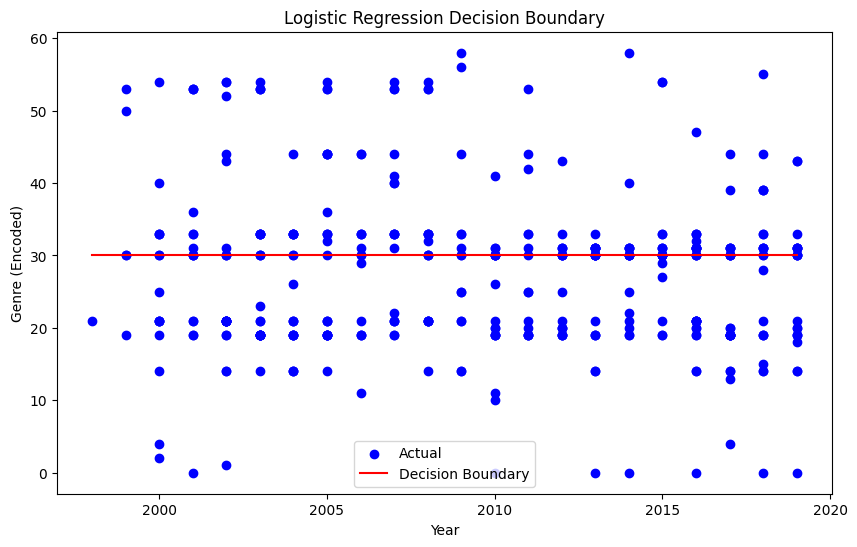

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Provided dataset
data = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")

# Verify column names in the dataset
print(data.columns)

# Split data into features and target
X = data[['year']]  # Make sure to use the correct column name from your dataset

# Convert the categorical target variable "genre" into numerical form using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['genre'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict
predictions = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, predictions, labels=label_encoder.transform(label_encoder.classes_), target_names=label_encoder.classes_))

# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Plot actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot decision boundary
x_values = np.linspace(min(X_test.values), max(X_test.values), 100).reshape(-1, 1)
y_values = logistic_model.predict(x_values)
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

# Add labels and title
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Year')
plt.ylabel('Genre (Encoded)')
plt.legend()

# Show plot
plt.show()



## **Polynomial regression**:
## 1.Import libraries
This section imports the required libraries:
*   Pandas: for data manipulation and analysis.
*   NumPy: for numerical computing.
*   Matplotlib: for data visualization.
*   scikit-learn functions: for train-test splitting, polynomial feature generation, linear regression modeling, and error calculation.
*   LabelEncoder: for encoding categorical target variable.

## 2.Data set
Reads the dataset from a CSV file.
## 3.Splitting Data
Splits the dataset into features (X) and target (y) variables. The 'year' column is used as the feature, and the 'genre' column is encoded and used as the target variable. The data is split into training and testing sets using train_test_split().
## 4.Polynomial Features
Generates polynomial features up to a specified degree (here, degree=3). This transforms the original features into polynomial features.
## 5.Fitting Linear Regression Model
Initializes and fits a linear regression model to the polynomial features.
## 6.Predictions
Predicts the target variable using the trained model and the polynomial features of the test data.
## 7.Evaluation Metrics
Calculates Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) to evaluate the model's performance.
## 8.Plotting Polynomial Regression Curve
This section plots the polynomial regression curve along with the actual data points. It first sorts the test data for better visualization and then plots the actual data points as blue dots and the polynomial regression curve as a red line. The plot is labeled with titles, axis labels, and a legend. Finally, it displays the plot.


Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')
Mean Squared Error: 123.66600646526233
Mean Absolute Error: 8.67838722642511
Root Mean Squared Error: 11.120521861192591
Coefficients (w values): [ 0.00000000e+00 -5.04699252e+04  2.51168689e+01 -4.16654733e-03]


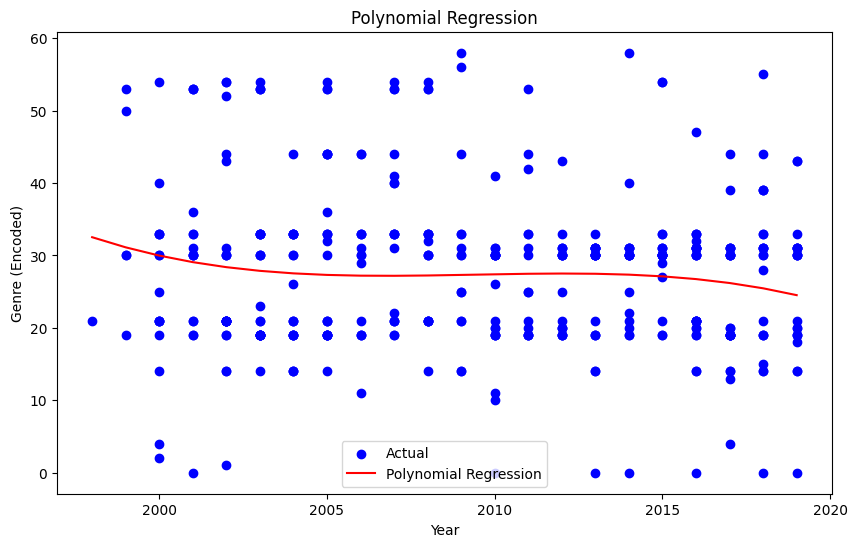

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# dataset
data = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")

# Verify column names in the dataset
print(data.columns)

# Split data into features and target
X = data[['year']]  # Make sure to use the correct column name from your dataset

# Convert the categorical target variable "genre" into numerical form using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['genre'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features
degree = 3  # Adjust the degree of polynomial features as needed
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict
predictions = model.predict(X_test_poly)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Coefficients (w values):", model.coef_)

# Plot the polynomial regression curve
plt.figure(figsize=(10, 6))

# Plot actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Sort X_test for better visualization
sorted_indices = np.argsort(X_test.values.ravel())
X_test_sorted = X_test.iloc[sorted_indices]
predictions_sorted = predictions[sorted_indices]

# Plot polynomial regression curve
plt.plot(X_test_sorted, predictions_sorted, color='red', label='Polynomial Regression')

# Add labels and title
plt.title('Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Genre (Encoded)')
plt.legend()

# Show plot
plt.show()


# **K-Nearest Neighbors (KNN) Classification**

This code implements KNN classification to predict music genres based on the year of release. It utilizes scikit-learn, a popular machine learning library in Python, for model building and evaluation.

# 1. Importing Necessary Libraries:

`pandas, numpy,` and `matplotlib.pyplot` for data manipulation, numerical computing, and data visualization, respectively.
`train_test_split from sklearn.model_selection` for splitting the dataset into training and testing sets.
`KNeighborsClassifier from sklearn.neighbor`s for building the KNN classification model.
`accuracy_score and classification_report from sklearn.metrics` for evaluating the model's performance.
`LabelEncoder from sklearn.preprocessing `for encoding the categorical target variable into numerical form.
# 2. Loading the Dataset:

The dataset is loaded from a CSV file. Make sure to provide the correct path to the dataset.
# 3. Data Preprocessing:

The features (year) and the target variable (genre) are extracted from the dataset.
The categorical target variable genre is encoded into numerical form using LabelEncoder.
# 4. Splitting Data:

The data is split into training and testing sets using the train_test_split function.
# 5. Model Building:

The KNN classifier is initialized and fitted to the training data using the KNeighborsClassifier class.
# 6. Model Evaluation:

The model predicts the genre labels for the test data.
The accuracy of the model is calculated using accuracy_score.
A detailed classification report is generated using classification_report.
# 7. Plotting the Decision Boundary:

A decision boundary plot is created to visualize the classification results.
Actual data points from the test set are plotted as blue dots.
The decision boundary, indicating the boundary between different predicted classes, is plotted in red.
# 8. Displaying the Plot:

The plot, along with axis labels, a title, and a legend, is displayed using matplotlib.pyplot.show().

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')
Accuracy: 0.145
                                       precision    recall  f1-score   support

                     Dance/Electronic       0.00      0.00      0.00         7
                   Folk/Acoustic, pop       0.00      0.00      0.00         1
                  Folk/Acoustic, rock       0.00      0.00      0.00         1
             Folk/Acoustic, rock, pop       0.00      0.00      0.00         0
                                  R&B       0.00      0.00      0.00         2
     World/Traditional, Folk/Acoustic       0.00      0.00      0.00         0
           World/Traditional, hip hop       0.00      0.00      0.00         0
               World/Traditional, pop       0.00      0.00      0.00         0
World/Tra

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

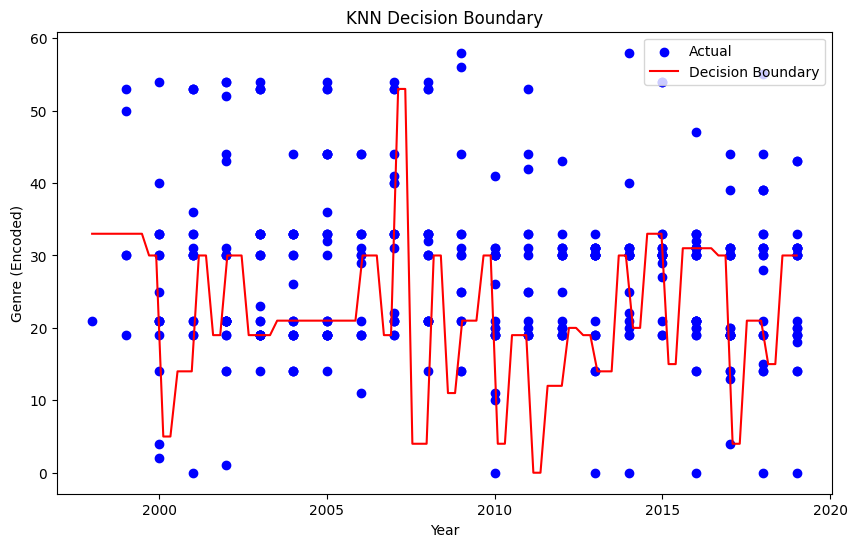

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Provided dataset
data = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")

# Verify column names in the dataset
print(data.columns)

# Split data into features and target
X = data[['year']]  # Make sure to use the correct column name from your dataset

# Convert the categorical target variable "genre" into numerical form using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['genre'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict
predictions = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, predictions, labels=label_encoder.transform(label_encoder.classes_), target_names=label_encoder.classes_))

# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Plot actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot decision boundary
x_values = np.linspace(min(X_test.values), max(X_test.values), 100).reshape(-1, 1)
y_values = knn_model.predict(x_values)
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

# Add labels and title
plt.title('KNN Decision Boundary')
plt.xlabel('Year')
plt.ylabel('Genre (Encoded)')
plt.legend()

# Show plot
plt.show()


# **CNN Model**
The Convolutional Neural Network (CNN) model uses TensorFlow Keras to predict the year of release for songs based on various audio features. The dataset used contains song attributes such as duration, popularity, danceability, energy, etc.

**Data Preprocessing:**
- The dataset is loaded using Pandas from a CSV file.
- Features such as 'duration_ms', 'popularity', 'danceability', etc., are selected as input features (X), while 'year' is chosen as the target variable (y).
- The data is split into training and testing sets using the train_test_split function from scikit-learn.
- The input data is reshaped to fit the input shape required for the CNN model.

**CNN Model Architecture:**
- The CNN model consists of a Conv1D layer with 32 filters and a kernel size of 3, followed by a MaxPooling1D layer with a pool size of 2.
- The output of the MaxPooling1D layer is flattened and passed through a Dense layer with 10 neurons and ReLU activation.
- Finally, a Dense layer with a single neuron is added as the output layer.
- The model is compiled with Mean Squared Error (MSE) loss and Adam optimizer, and Mean Absolute Error (MAE) is used as a metric.

**Model Training:**
- The model is trained on the training data for 10 epochs with a batch size of 32.
- During training, the loss and validation loss are monitored and stored in the history object.

**Model Evaluation:**
- After training, the model is evaluated on the testing data, and both MSE and MAE are calculated.
- The results are printed to the console.

**Visualization:**
- The training and validation loss curves are plotted using Matplotlib to visualize the model's learning progress over epochs.

**Dependencies:**
- Pandas: For data manipulation and loading the dataset.
- NumPy: For numerical computations and array operations.
- scikit-learn: For data splitting and evaluation metrics.
- TensorFlow (with Keras API): For building and training the CNN model.
- Matplotlib: For data visualization, specifically for plotting the training and validation loss curves.

**Purpose:**
- The purpose of this project is to demonstrate how to implement a CNN model for predicting the year of release based on song features.
- It provides a hands-on example of building a deep learning model using TensorFlow Keras and showcases the process of data preprocessing, model building, training, evaluation, and visualization.


Epoch 1/10
40/40 [==============================] - 3s 12ms/step - loss: 8148478.5000 - mae: 1972.7991 - val_loss: 733862.9375 - val_mae: 834.8480
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 224920.4062 - mae: 372.2516 - val_loss: 116308.9375 - val_mae: 282.2414
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 116496.0781 - mae: 262.9628 - val_loss: 106184.6719 - val_mae: 249.5329
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 118523.0469 - mae: 263.0733 - val_loss: 110951.9219 - val_mae: 272.1358
Epoch 5/10
40/40 [==============================] - 0s 5ms/step - loss: 117523.1641 - mae: 265.5819 - val_loss: 112394.8984 - val_mae: 274.9384
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 120436.9219 - mae: 268.4318 - val_loss: 105289.6641 - val_mae: 249.6548
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 119819.9531 - mae: 265.7508 - val_loss: 104847.2500 - val_mae

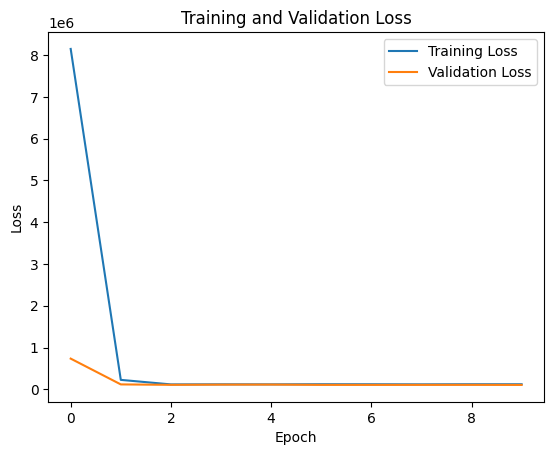

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt

# Provided dataset
data = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")

# Selecting features and target
X = data[['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
          'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = data['year']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshaping data for CNN
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Initialize and compile CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()




# **SVM Model**
The Support Vector Machine (SVM) model for classification using the scikit-learn library. It aims to classify songs into different genres based on their audio features. The dataset used contains song attributes such as duration, popularity, danceability, energy, etc., along with the genre label.

**Data Preprocessing:**
- The dataset is loaded using Pandas from a CSV file.
- Features such as 'duration_ms', 'popularity', 'danceability', etc., are selected as input features (X), while 'genre' is chosen as the target variable (y).
- The categorical target variable 'genre' is encoded using LabelEncoder to convert it into numerical labels.
- The data is split into training and testing sets using the train_test_split function from scikit-learn.
- Features are standardized using StandardScaler to ensure that each feature has a mean of 0 and a standard deviation of 1, which helps improve the performance of the SVM model.

**SVM Model Training:**
- An SVM model with a linear kernel is initialized with default parameters (C=1.0) and trained on the standardized training data using the fit method.
- The model learns the optimal hyperplane that separates the different classes in the feature space.

**Model Evaluation:**
- The trained SVM model is used to predict the class labels for the testing data using the predict method.
- The accuracy of the model is calculated by comparing the predicted labels with the true labels from the testing set using the accuracy_score function.
- The accuracy score provides an indication of how well the model performs in classifying the songs into their respective genres.

**Visualization:**
- A confusion matrix is plotted using the seaborn library to visualize the performance of the SVM model.
- The confusion matrix shows the number of correct and incorrect predictions made by the model for each class.
- Each row of the matrix represents the true labels, while each column represents the predicted labels.
- The values in the matrix indicate the number of samples that belong to each class and were correctly or incorrectly classified by the model.

**Dependencies:**
- Pandas: For data manipulation and loading the dataset.
- scikit-learn: For data splitting, preprocessing, model training, and evaluation.
- Matplotlib and seaborn: For data visualization, specifically for plotting the confusion matrix.

**Purpose:**
- The purpose of this project is to demonstrate how to use SVM for multi-class classification tasks, such as genre classification based on song features.
- It provides a practical example of data preprocessing, model training, evaluation, and visualization using scikit-learn and other Python libraries.


Accuracy: 0.2825


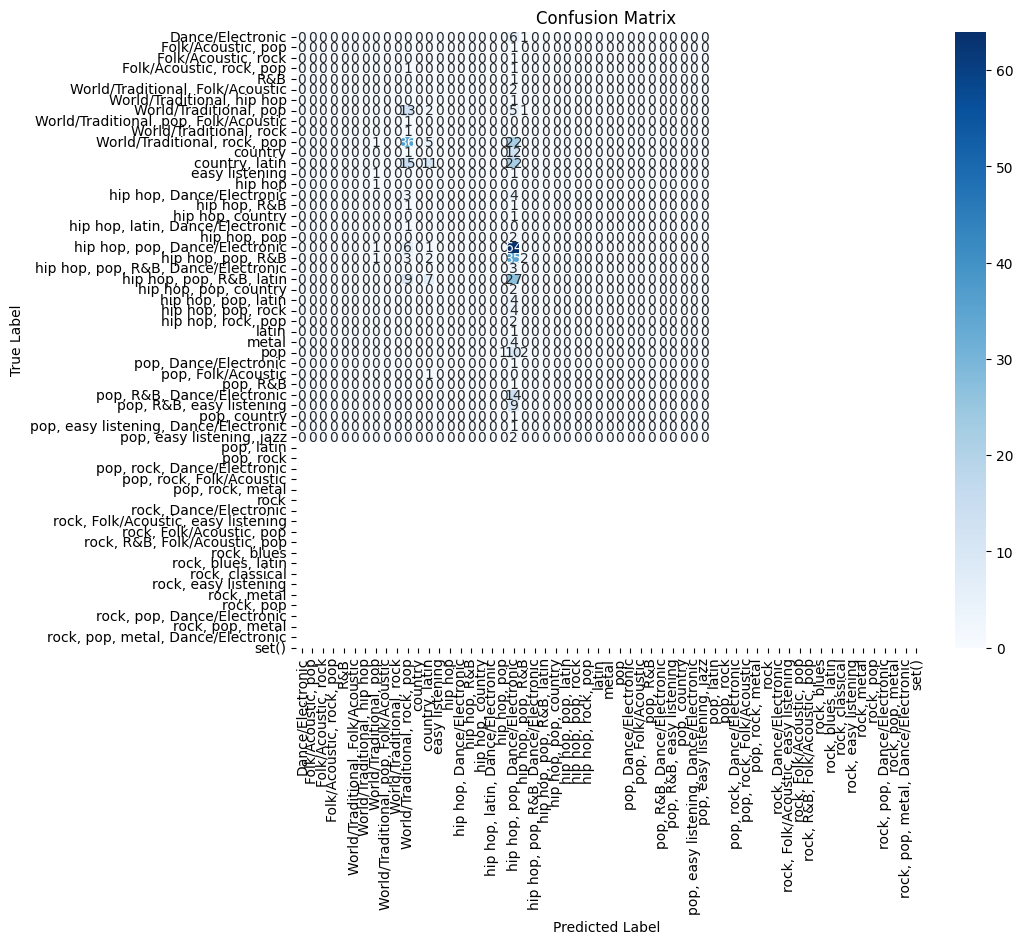

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")

# Select features and target variable
X = data[['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
          'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = data['genre']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# **K-Means Clustering**
The  K-means clustering on the given dataset of songs, using the features 'duration_ms' and 'popularity', and visualizes the clusters in a scatter plot. Here's an explanation of each part of the code:

1. **Importing Libraries**:
    - Pandas is imported as pd for data manipulation.
    - KMeans from sklearn.cluster is imported for clustering.
    - StandardScaler from sklearn.preprocessing is imported for feature standardization.
    - Matplotlib.pyplot is imported as plt for data visualization.

2. **Loading the Dataset**:
    - The dataset containing song features is loaded from a CSV file using pd.read_csv.

3. **Selecting Features**:
    - Features relevant for clustering ('duration_ms', 'popularity') are selected and stored in the variable X.

4. **Standardizing Features**:
    - The selected features are standardized using StandardScaler to ensure they have a mean of 0 and a standard deviation of 1, which is important for K-means clustering.

5. **Initializing and Fitting K-means Model**:
    - A KMeans object is initialized with 3 clusters, a random state of 42, and n_init parameter set to 10 explicitly to suppress future warnings.
    - The KMeans model is fitted to the standardized feature data.

6. **Getting Cluster Labels**:
    - Cluster labels for each data point are obtained using the labels_ attribute of the fitted KMeans model.

7. **Adding Cluster Labels to the Dataset**:
    - The cluster labels are added as a new column named 'cluster' to the original dataframe.

8. **Visualizing Clusters**:
    - A scatter plot is created to visualize the clusters.
    - Each cluster is plotted with a different color.
    - The x-axis represents the 'duration_ms' feature, and the y-axis represents the 'popularity' feature.
    - A legend is added to the plot to indicate the clusters.

9. **Displaying the Plot**:
    - The plot is displayed

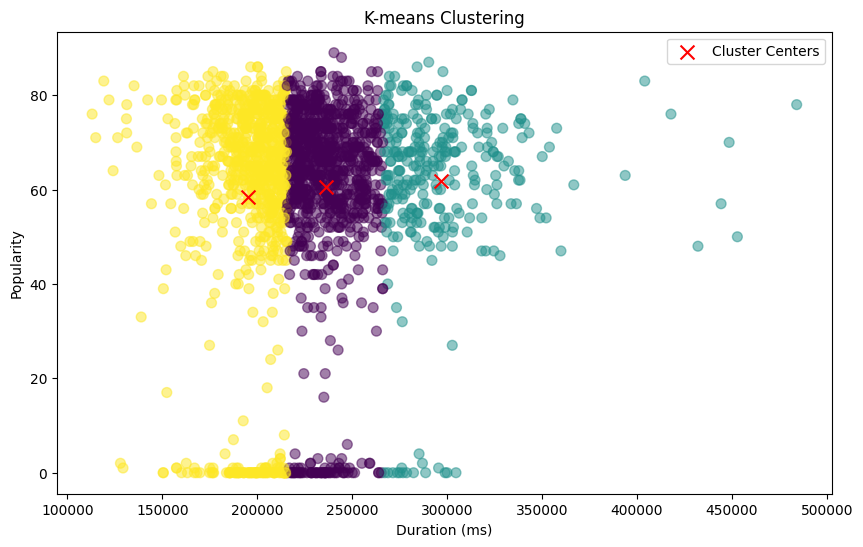

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")

# Select features for clustering
X = data[['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
          'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Explicitly set n_init
kmeans.fit(X)

# Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Add cluster labels to the dataset
data['cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Scatter plot for the first two features (change as needed)
plt.scatter(X['duration_ms'], X['popularity'], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')

plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('K-means Clustering')
plt.legend()
plt.show()


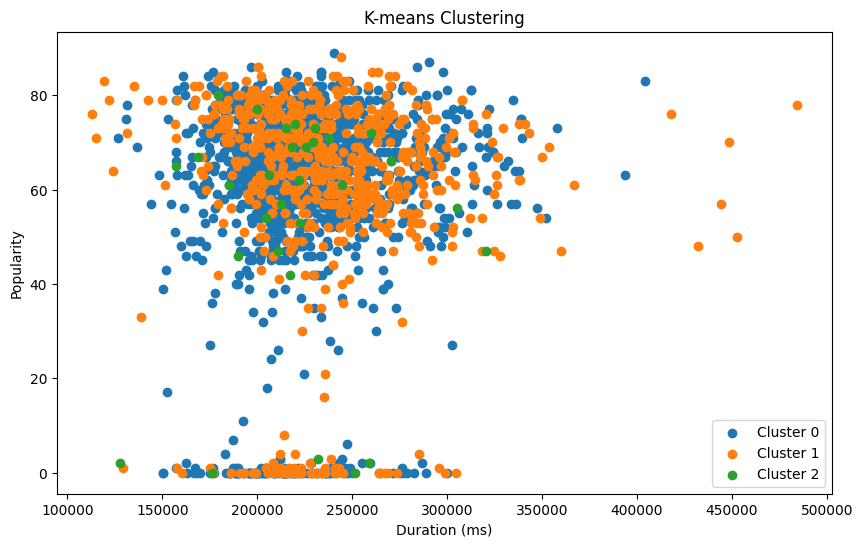

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")

# Select features for clustering
X = data[['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
          'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit K-means clustering model with n_init parameter explicitly set
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
data['cluster'] = cluster_labels

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(data['cluster'].unique()):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['duration_ms'], cluster_data['popularity'], label=f'Cluster {cluster}')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('K-means Clustering')
plt.legend()
plt.show()


+-----------------------+--------------------+
|         Model         |   Accuracy/RMSE    |
+-----------------------+--------------------+
|     KNN Classifier    |       0.045        |
|   Linear Regression   | 21.79557461640385  |
|  Logistic Regression  | 49.142293393776406 |
| Polynomial Regression | 22.104668721262808 |
|     SVM Classifier    |       0.0525       |
+-----------------------+--------------------+


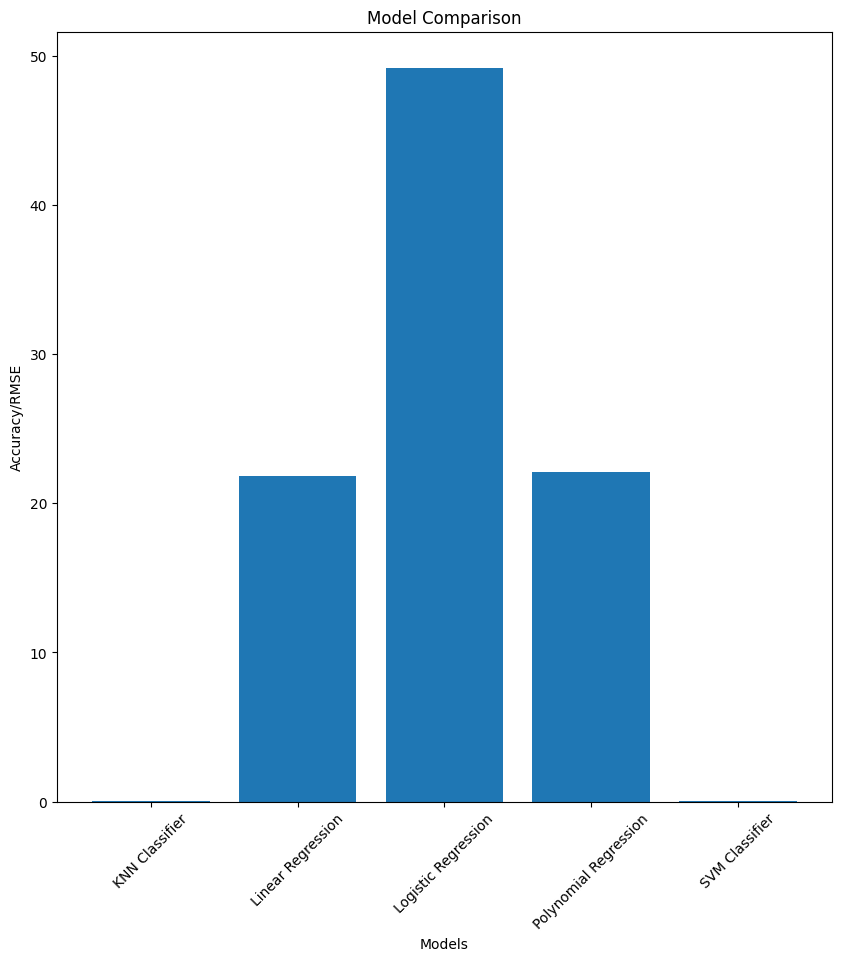

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/songs_normalize.csv")

# Select features for clustering
X_clustering = data[['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
                    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Standardize the features for clustering
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)

# Initialize and fit K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_clustering_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
data['cluster'] = cluster_labels

# Select features for classification and regression
X_classification_regression = data[['danceability', 'energy', 'loudness',
                                    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y_classification_regression = data['popularity']  # Target variable for regression and classification

# Splitting data for classification and regression tasks
X_train, X_test, y_train, y_test = train_test_split(X_classification_regression, y_classification_regression,
                                                    test_size=0.2, random_state=42)

# Feature Scaling for classification and regression tasks
scaler_classification_regression = StandardScaler()
X_train_scaled = scaler_classification_regression.fit_transform(X_train)
X_test_scaled = scaler_classification_regression.transform(X_test)

# Model Initialization
models = {
    "KNN Classifier": KNeighborsClassifier(),
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "Polynomial Regression": PolynomialFeatures(degree=2),
    "SVM Classifier": SVC()
}

# Training and Evaluation
results = {}
for name, model in models.items():
    if name == "Polynomial Regression":
        # Transform features
        X_poly_train = model.fit_transform(X_train_scaled)
        X_poly_test = model.transform(X_test_scaled)
        # Fit linear regression on transformed features
        lin_reg_poly = LinearRegression()
        lin_reg_poly.fit(X_poly_train, y_train)
        y_pred = lin_reg_poly.predict(X_poly_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    if "Classifier" in name:
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
    else:
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        results[name] = rmse

# Create table for results
table = PrettyTable()
table.field_names = ["Model", "Accuracy/RMSE"]
for name, result in results.items():
    table.add_row([name, result])

# Print table
print(table)

# Visualize Comparison
plt.bar(results.keys(), results.values())
plt.xlabel('Models')
plt.ylabel('Accuracy/RMSE')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()
